In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import pmdarima as pm
from pmdarima import model_selection

from xgboost import XGBClassifier

In [ ]:
dataset = pd.read_csv('API Call Dataset.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21371 entries, 0 to 21370
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   API Code      21371 non-null  object
 1   Time of Call  21371 non-null  object
dtypes: object(2)
memory usage: 334.0+ KB


In [6]:
dataset['API Code'].value_counts()

API Code
A9    2451
A2    2438
A7    2410
A4    2402
A1    2363
A3    2359
A6    2348
A5    2323
A8    2277
Name: count, dtype: int64

In [7]:
# A9 A2 A7 are top three most frequent calls
dataset[dataset['API Code']=='A9'].to_csv('A9.csv',index = False)
dataset[dataset['API Code']=='A2'].to_csv('A2.csv', index = False)
dataset[dataset['API Code']=='A7'].to_csv('A7.csv', index = False)

In [8]:
A2_dataset = pd.read_csv('A2.csv')
A7_dataset = pd.read_csv('A7.csv')
A9_dataset = pd.read_csv('A9.csv')

In [9]:
A2_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438 entries, 0 to 2437
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   API Code      2438 non-null   object
 1   Time of Call  2438 non-null   object
dtypes: object(2)
memory usage: 38.2+ KB


In [12]:
A2_dataset['time_of_call'] = pd.to_datetime(A2_dataset['Time of Call'],format='mixed',dayfirst=True)
A2_dataset = A2_dataset.drop('Time of Call',axis=1)

A7_dataset['time_of_call'] = pd.to_datetime(A7_dataset['Time of Call'],format='mixed',dayfirst=True)
A7_dataset = A7_dataset.drop('Time of Call',axis=1)

A9_dataset['time_of_call'] = pd.to_datetime(A9_dataset['Time of Call'],format='mixed',dayfirst=True)
A9_dataset = A9_dataset.drop('Time of Call',axis=1)

In [16]:
A2_dataset['time_of_call']=A2_dataset['time_of_call'].astype('int')
A7_dataset['time_of_call']=A7_dataset['time_of_call'].astype('int')
A9_dataset['time_of_call']=A9_dataset['time_of_call'].astype('int')

In [17]:
processed_dataset = pd.concat([A2_dataset,A7_dataset,A9_dataset],axis=0)

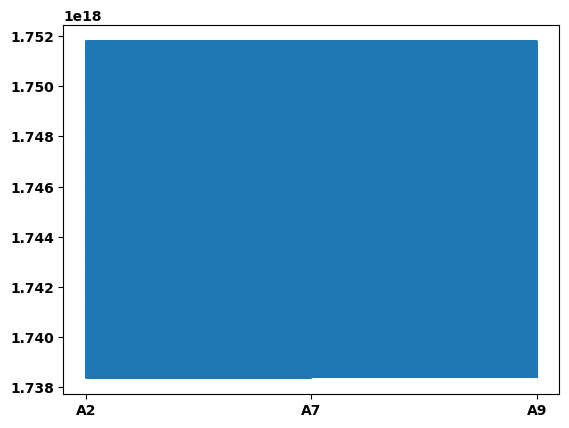

In [21]:
processed_dataset=processed_dataset.sort_values(by='time_of_call')
plt.plot(processed_dataset['API Code'],processed_dataset['time_of_call'])

In [ ]:
le=LabelEncoder()
processed_dataset['code']=le.fit_transform(processed_dataset['API Code'])

In [31]:
x_train_A2 , x_test_A2 = train_test_split(A2_dataset['time_of_call'] , test_size = 0.2)
x_train_A7 , x_test_A7 = train_test_split(A7_dataset['time_of_call'] , test_size = 0.2)
x_train_A9 , x_test_A9 = train_test_split(A9_dataset['time_of_call'] , test_size = 0.2)

In [33]:
arima_A9 = pm.auto_arima(x_train_A9, error_action='ignore', trace=True,suppress_warnings=True, maxiter=5,seasonal=True, m=12)
arima_A7 = pm.auto_arima(x_train_A9, error_action='ignore', trace=True,suppress_warnings=True, maxiter=5,seasonal=True, m=12)
arima_A2 = pm.auto_arima(x_train_A9, error_action='ignore', trace=True,suppress_warnings=True, maxiter=5,seasonal=True, m=12)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.76 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=146228.160, Time=0.05 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=1.59 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=168442.044, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=170217.460, Time=0.03 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=1.43 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=146230.159, Time=0.17 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=168782.654, Time=0.18 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=146393.371, Time=0.22 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 5.542 seconds
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=146228.

In [35]:
arima_A2_pred = arima_A2.predict(n_periods=len(x_test_A2))
arima_A7_pred = arima_A7.predict(n_periods=len(x_test_A7))
arima_A9_pred = arima_A9.predict(n_periods=len(x_test_A9))

d:\IDEs\anaconda\envs\time_series_assgt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\IDEs\anaconda\envs\time_series_assgt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
d:\IDEs\anaconda\envs\time_series_assgt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\IDEs\anaconda\envs\time_series_assgt\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a suppor